## Z-test
#### See if a biased coin results in the rejection of the null hypothesis (the coin is fair). 

In [24]:
import numpy as np
from scipy.stats import norm

# Parameters
n = 100               # number of coin flips
p_observed = 0.64     # observed proportion of tails
p_null = 0.50         # null hypothesis (fair coin)
stde_null = np.sqrt(p_null * (1 - p_null) / n)  # standard error under null

# Compute Z value
z = (p_observed - p_null) / stde_null

# Two-sided p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# Output
print(f"Z-value: {z:.3f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: The coin is fair.")
else:
    print("Fail to reject the null hypothesis: The coin is biased.")


Z-value: 2.800
P-value: 0.0051
Reject the null hypothesis: The coin is fair.


## T-test 
#### See if reservoir mean arsenic concentraiton is above the standard (10ppb) and statistically significant. 

Sample mean: 10.9 ppb
Sample standard deviation: 2.0 ppb
T-statistic: 0.983
One-sided p-value: 0.1906
95% Confidence Interval: (8.39, 13.37) ppb
Fail to reject the null hypothesis: No significant evidence that arsenic > 10 ppb.


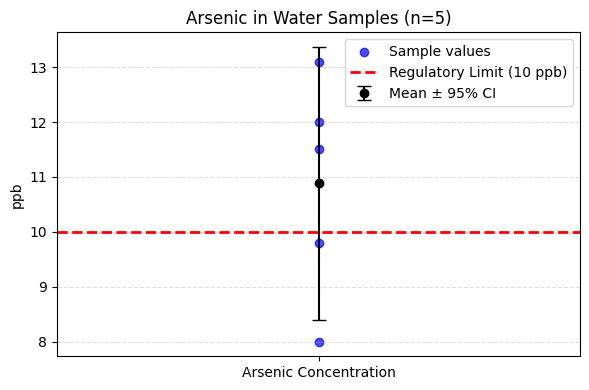

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given data
arsenic_levels = np.array([11.5, 8.0, 12.0, 9.8, 13.1])
n = len(arsenic_levels)
limit = 10.0  # regulatory threshold (null hypothesis mean)

# Sample statistics
sample_mean = np.mean(arsenic_levels)
std_dev = np.std(arsenic_levels, ddof=1)
se = std_dev / np.sqrt(n)

print(f"Sample mean: {sample_mean:.1f} ppb")
print(f"Sample standard deviation: {std_dev:.1f} ppb")

# Compute t-statistic
t_stat = (sample_mean - limit) / se
p_value = 1 - stats.t.cdf(t_stat, df=n-1)

# 95% confidence interval
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_lower = sample_mean - t_crit * se
ci_upper = sample_mean + t_crit * se

# Output
print(f"T-statistic: {t_stat:.3f}")
print(f"One-sided p-value: {p_value:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}) ppb")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Arsenic concentration is significantly above 10 ppb.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that arsenic > 10 ppb.")

# Plot
plt.figure(figsize=(6, 4))
plt.errorbar(1, sample_mean, yerr=[[sample_mean - ci_lower], [ci_upper - sample_mean]], 
             fmt='o', capsize=5, label='Mean ± 95% CI', color='black')
plt.scatter(np.full(n, 1), arsenic_levels, color='blue', alpha=0.7, label='Sample values')

# Red reference line for regulatory threshold
plt.axhline(y=10.0, color='red', linestyle='--', linewidth=2, label='Regulatory Limit (10 ppb)')

# Formatting
plt.xticks([1], ['Arsenic Concentration'])
plt.ylabel('ppb')
plt.title('Arsenic in Water Samples (n=5)')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Two-sample Z-test
#### Compare the test scores from two schools to see if the differences are statistically significant. 

In [1]:
import numpy as np
from scipy.stats import norm

# Sample data from two schools
mean_a = 78
std_a = 10
n_a = 100

mean_b = 74
std_b = 12
n_b = 100

# Standard error of the difference
se = np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Z-statistic
z = (mean_a - mean_b) / se

# Two-sided p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# Output
print(f"Z-statistic: {z:.3f}")
print(f"Two-sided p-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

Z-statistic: 2.561
Two-sided p-value: 0.0104
Reject the null hypothesis: The means are significantly different.


## Paired-difference test
### Compare lead levels in drinking water form 5 households before and after installing a water filter. 

Mean lead before filtering: 13.76 ppb
Standard deviation before filtering: 0.99 ppb
Mean lead after filtering: 12.68 ppb
Standard deviation after filtering: 0.76 ppb

Paired t-statistic: 4.289
Two-sided p-value: 0.0128
Reject the null hypothesis: There is a significant difference in lead levels.


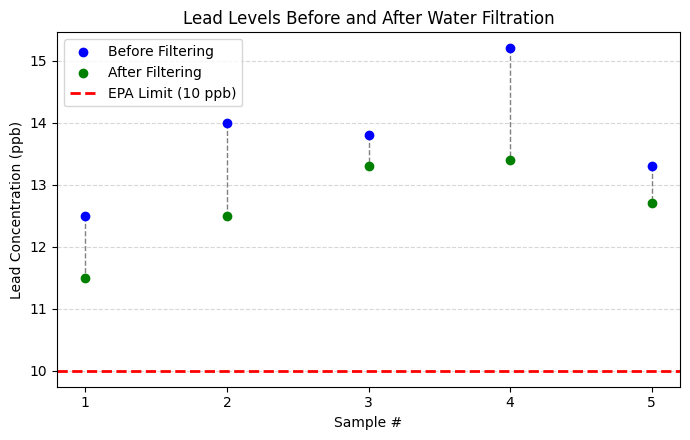

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Lead levels in ppb: before and after filtration
before = np.array([12.5, 14.0, 13.8, 15.2, 13.3])
after  = np.array([11.5, 12.5, 13.3, 13.4, 12.7])
n = len(before)

# Compute stats
mean_before = np.mean(before)
std_before = np.std(before, ddof=1)
mean_after = np.mean(after)
std_after = np.std(after, ddof=1)

# Paired t-test
t_stat, p_value = ttest_rel(before, after)

# Output summary
print(f"Mean lead before filtering: {mean_before:.2f} ppb")
print(f"Standard deviation before filtering: {std_before:.2f} ppb")
print(f"Mean lead after filtering: {mean_after:.2f} ppb")
print(f"Standard deviation after filtering: {std_after:.2f} ppb")
print(f"\nPaired t-statistic: {t_stat:.3f}")
print(f"Two-sided p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in lead levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference detected.")

# Visualization
sample_indices = np.arange(1, n+1)

plt.figure(figsize=(7, 4.5))

# Plot lines connecting before and after for each sample
for i in range(n):
    plt.plot([sample_indices[i], sample_indices[i]], [before[i], after[i]], 'gray', linestyle='--', linewidth=1)

# Plot before and after points
plt.scatter(sample_indices, before, color='blue', label='Before Filtering', zorder=3)
plt.scatter(sample_indices, after, color='green', label='After Filtering', zorder=3)

# Reference line at 10 ppb
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='EPA Limit (10 ppb)')

# Formatting
plt.xticks(sample_indices)
plt.xlabel("Sample #")
plt.ylabel("Lead Concentration (ppb)")
plt.title("Lead Levels Before and After Water Filtration")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Sign Test
#### Compare values before and after blood pressure treatment to see if there is a consistent direction of change.

Positive differences: 0
Negative differences: 10
Two-sided p-value (Sign Test): 0.0020
Reject the null hypothesis: There is a significant directional effect.


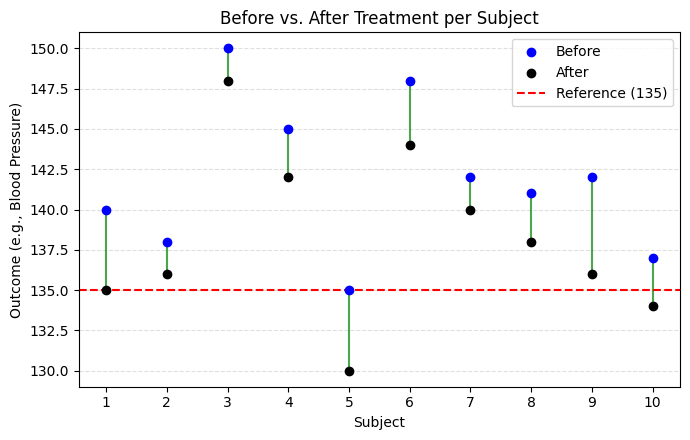

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

# Paired data: outcome before and after treatment
before = np.array([140, 138, 150, 145, 135, 148, 142, 141, 142, 137])
after  = np.array([135, 136, 148, 142, 130, 144, 140, 138, 136, 134])

# Compute differences and signs
differences = after - before
signs = np.sign(differences)

# Count non-zero signs
n_pos = np.sum(signs > 0)
n_neg = np.sum(signs < 0)
n = n_pos + n_neg  # exclude ties (no change)

# Perform two-sided sign test
p_value = binomtest(min(n_pos, n_neg), n=n, p=0.5, alternative='two-sided').pvalue

# Output
print(f"Positive differences: {n_pos}")
print(f"Negative differences: {n_neg}")
print(f"Two-sided p-value (Sign Test): {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant directional effect.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of directional change.")

# 🎨 Visualization
subjects = np.arange(1, len(before) + 1)
plt.figure(figsize=(7, 4.5))

for i in range(len(before)):
    color = 'green' if after[i] < before[i] else ('orange' if after[i] > before[i] else 'gray')
    plt.plot([subjects[i], subjects[i]], [before[i], after[i]], linestyle='-', color=color, alpha=0.7)
    plt.scatter(subjects[i], before[i], color='blue', label='Before' if i == 0 else "", zorder=3)
    plt.scatter(subjects[i], after[i], color='black', label='After' if i == 0 else "", zorder=3)

plt.axhline(y=135, color='red', linestyle='--', label='Reference (135)', linewidth=1.5)
plt.xticks(subjects)
plt.xlabel("Subject")
plt.ylabel("Outcome (e.g., Blood Pressure)")
plt.title("Before vs. After Treatment per Subject")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
